In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

Download the latest chrome driver from: https://sites.google.com/a/chromium.org/chromedriver/downloads
place it in a directory and take note of the path

In [2]:
browser = webdriver.Chrome("./chromedriver")

In [3]:
browser.get('http://www.instagram.com/')

Perform the following:
1. Log in with instagram credentials. 
2. Search for something.

#### Automated Login

In [4]:
browser.find_element_by_css_selector('p[class="_g9ean"]').find_element_by_tag_name("a").click()

In [5]:
import os

In [6]:
email_field = browser.find_element_by_name("username")

In [7]:
email_field.send_keys(os.environ.get("instagram_email"))

In [8]:
password_field = browser.find_element_by_name("password")

In [9]:
password_field.send_keys(os.environ.get("instagram_password"))

In [10]:
button = browser.find_element_by_css_selector('button[class="_qv64e _gexxb _4tgw8 _njrw0"]')

In [11]:
button.click()

For each post that appears in the search results, extract the caption. Depending on whether the post contains the hashtag "sponsored" take note of the link to the post. 

In [37]:
# inspect source, changes regularly
css_selector = 'div[class="_mck9w _gvoze _tn0ps"]'

what's a div??: https://forums.digitalpoint.com/proxy/V%2FlNRoM4xGeP4jwhh2L%2BjeHwkEChNlXn6jUK3ET1ZceizQ%3D%3D/image.png

**Note**: tag is in purple font, attribute is in yellow font

In [40]:
allposts = browser.find_elements_by_css_selector(css_selector)
list_of_sponsored_posts = []
for post in allposts:
    
    post_image = post.find_element_by_tag_name("img")
    caption = post_image.get_attribute("alt")
    
    post_link = post.find_element_by_tag_name("a")
    link = post_link.get_attribute("href")
    
    if "#sponsored" in caption.lower():
        list_of_sponsored_posts.append(link)
    

In [41]:
list_of_sponsored_posts

['https://www.instagram.com/p/BdtT7R_DkYe/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/BdtwQdHDslx/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/Bdtv4iUBvyZ/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/Bdt5niPjGaU/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/Bdtwp27HwvQ/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/BdtwgA9nU57/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/Bdtv56cFCH7/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/BdtuMpelny1/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/BdtuJJRgnQk/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/BdttRH3FlvX/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/Bdts8vHgbHd/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/BdsCWWdjGe4/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/Bdr_NrdhFgx/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/Bdr7hffBNjm/?tagged=mofsgxstarngage',
 'https://www.instagram.com/p/Bdr7ePwHN2z/?tagge

Visit each post to obtain the instagram username of the influencer

In [43]:
# Fancy progress bar
from tqdm import tqdm

tqdm means “progress” in Arabic (taqadum, تقدّم) and an abbreviation for “I love you so much” in Spanish (te quiero demasiado).

Instantly make your loops show a smart progress meter - just wrap any iterable with tqdm(iterable), and you’re done!

In [44]:
list_of_mof_influencers = []
css_selector = 'div[class="_eeohz"]'
for link in tqdm(list_of_sponsored_posts):
    browser.get(link)
    time.sleep(1)
    list_of_mof_influencers.append(browser.find_element_by_css_selector(css_selector).text)

100%|██████████| 15/15 [00:35<00:00,  2.37s/it]


In [17]:
list_of_mof_influencers

['awinsomelife',
 'awinsomelife',
 'celinebleh',
 'cheowster',
 'theroycelee',
 'kwleong',
 'mshannahchia',
 'miss_teatime_sg',
 'tjang.fonda',
 'andreatansh',
 'herdailymuse',
 'mandalogy21',
 'kavielteo',
 'denisetaytay',
 'shanelkiehls']

In [18]:
# Remove duplicates (order is lost)
list_of_mof_influencers = list(set(list_of_mof_influencers))

In [19]:
list_of_mof_influencers

['mandalogy21',
 'shanelkiehls',
 'kwleong',
 'kavielteo',
 'cheowster',
 'theroycelee',
 'awinsomelife',
 'miss_teatime_sg',
 'tjang.fonda',
 'celinebleh',
 'andreatansh',
 'herdailymuse',
 'mshannahchia',
 'denisetaytay']

Now that we have the instagram usernames of all the influencers in the campaign, we would like to scrap their individual pages. First, we have to tackle the problem of scrolling.

In [20]:
def scroll_page(n_scrolls):
    body_elem = browser.find_element_by_tag_name("body")
    for i in range(n_scrolls):
        print("scrolling..." + str(i + 1))
        body_elem.send_keys(Keys.END)
        time.sleep(2)
            

In [21]:
scroll_page(5)

scrolling...1
scrolling...2
scrolling...3
scrolling...4
scrolling...5


This block of code saves an image from a given url

In [22]:
import urllib.request

def save_img(img_src, filename):
    urllib.request.urlretrieve(img_src, filename)
    # TODO: Handle http response for errors

From each post, grab the:
1. Link of the post 
2. Img url and Caption

**Edit**: Added influencer column to demonstrate groupby operation

In [23]:
def scrape_links_and_captions_from_page(influencer, css_selector, n_scrolls):
    page_url = "https://www.instagram.com/" + influencer
    browser.get(page_url)
    scroll_page(n_scrolls)
    allposts = browser.find_elements_by_css_selector(css_selector)
    # start with an empty list of data
    data = []
    counter = 0
    print("saving data...")
    for post in allposts:
        post_link = post.find_element_by_tag_name("a")
        post_image = post.find_element_by_tag_name("img")

        link = post_link.get_attribute("href")
        caption = post_image.get_attribute("alt")
        image_url = post_image.get_attribute("src")
        
        # assigns a unique file name to each image
        filename = "./data/%s_%s.jpg"%(influencer,str(counter))
        
        save_img(image_url, filename)
        data.append([influencer,link,caption,filename])
        counter += 1
        
    return data

list indexing: https://i.stack.imgur.com/vIKaD.png

In [24]:
css_selector_posts = 'div[class="_mck9w _gvoze _tn0ps"]'
all_data = []
for influencer in list_of_mof_influencers[-3:]:
    print(influencer)
    data = scrape_links_and_captions_from_page(influencer, css_selector_posts, n_scrolls=5)
    all_data += data

herdailymuse
scrolling...1
scrolling...2
scrolling...3
scrolling...4
scrolling...5
saving data...
mshannahchia
scrolling...1
scrolling...2
scrolling...3
scrolling...4
scrolling...5
saving data...
denisetaytay
scrolling...1
scrolling...2
scrolling...3
scrolling...4
scrolling...5
saving data...


### "Data Analysis"

In [75]:
import pandas as pd
df = pd.DataFrame(all_data, columns=["influencer","links", "captions","filename"])

In [76]:
df["word_count"] = df.captions.apply(lambda x: len(x.split(" ")))

In [77]:
df.head()

,influencer,links,captions,filename,word_count
0,herdailymuse,https://www.instagram.com/p/BckDb9aAsIZ/?taken...,"Card games, mugs, stuffed toys, musical gifts,...",./data/herdailymuse_0.jpg,78
1,herdailymuse,https://www.instagram.com/p/Bchhz55gPgX/?taken...,Xmas is coming ❄️☺️👍🏻,./data/herdailymuse_1.jpg,4
2,herdailymuse,https://www.instagram.com/p/BcCrhcKANz5/?taken...,It's Tuesday! One more day to mid-week ;) Had ...,./data/herdailymuse_2.jpg,126
3,herdailymuse,https://www.instagram.com/p/Bb1y3_ZgjWJ/?taken...,Brought my Sudio Tre Earphones out for a run 🏃...,./data/herdailymuse_3.jpg,101
4,herdailymuse,https://www.instagram.com/p/Bb0VHFXAdmv/?taken...,[TELEPORT TO ANOTHER WORLD] with Sudio Sweden ...,./data/herdailymuse_4.jpg,118


In [78]:
df.groupby("influencer").mean()

,word_count
influencer,
denisetaytay,81.111111
herdailymuse,61.311111
mshannahchia,86.711111


### Bonus: Sentiment Analysis

In [80]:
# Afinn's was trained on language from micro-blogs (e.g. twitter) and is hence quite suitable for our case!
from afinn import Afinn
afinn = Afinn()
print(afinn.score('This is utterly excellent!'), #Score of 3.0
afinn.score('This is utterly excellent! LOL'),   #Score of 6.0
afinn.score('This is utterly excellent! LOL LMAO')) #Score of 10.0

3.0 6.0 10.0


In [81]:
df["sentiment"] = df.captions.apply(afinn.score)

In [94]:
df.head()

,influencer,links,captions,filename,word_count,sentiment
0,herdailymuse,https://www.instagram.com/p/BckDb9aAsIZ/?taken...,"Card games, mugs, stuffed toys, musical gifts,...",./data/herdailymuse_0.jpg,78,11.0
1,herdailymuse,https://www.instagram.com/p/Bchhz55gPgX/?taken...,Xmas is coming ❄️☺️👍🏻,./data/herdailymuse_1.jpg,4,0.0
2,herdailymuse,https://www.instagram.com/p/BcCrhcKANz5/?taken...,It's Tuesday! One more day to mid-week ;) Had ...,./data/herdailymuse_2.jpg,126,19.0
3,herdailymuse,https://www.instagram.com/p/Bb1y3_ZgjWJ/?taken...,Brought my Sudio Tre Earphones out for a run 🏃...,./data/herdailymuse_3.jpg,101,15.0
4,herdailymuse,https://www.instagram.com/p/Bb0VHFXAdmv/?taken...,[TELEPORT TO ANOTHER WORLD] with Sudio Sweden ...,./data/herdailymuse_4.jpg,118,24.0


In [83]:
df.groupby("influencer").mean()

,word_count,sentiment
influencer,,
denisetaytay,81.111111,6.866667
herdailymuse,61.311111,7.622222
mshannahchia,86.711111,6.311111


__herdailymuse__ has the lowest average `word_count` and highest average `sentiment`

In [79]:
# Save the dataframe to a csv
df.to_csv("mof_ig_data.csv")

In [107]:
import matplotlib.pyplot as plt

Text(0.5,1,'sentiment - word_count graph')

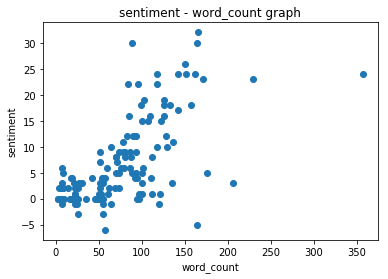

In [116]:
plt.scatter(df.word_count, df.sentiment)
plt.xlabel("word_count")
plt.ylabel("sentiment")
plt.title("sentiment - word_count graph")